# 线性回归

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
# 查看原始测试数据
data = pd.read_csv('data/purchased_data.csv')
data

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,32000,Yes
5,France,35,58000,Yes
6,Spain,32,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


方便起见，仅仅建立Salary和Purchased的线性模型

In [3]:
data = data.drop(['Country', 'Purchased'], axis=1)
data

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,32000
5,35,58000
6,32,52000
7,48,79000
8,50,83000
9,37,67000


分离获取X和y数据

In [4]:
X = data['Age'].values.flatten()
y = data['Salary'].values.flatten() # 必须是1d拉平的非矩阵形式
print('X {}\ny{}'.format(X, y))  # 0: No, 1: Yes

X [44 27 30 38 40 35 32 48 50 37 38 39 34 45 35 25 29 37]
y[72000 48000 54000 61000 32000 58000 52000 79000 83000 67000 68000 69000
 57000 87000 35000 45000 28000 49000]


划分训练和测试数据

In [5]:
num_train = int(0.8 * len(data))
num_test = len(data) - num_train

# 训练的数据
X_train = np.array(X[: num_train]).reshape((-1, 1))
y_train = np.array(y[: num_train])

# 测试的数据
X_test = np.array(X[num_train: ]).reshape((-1, 1))
y_test = np.array(y[num_train: ])
print('训练数据{}\n{}\n测试数据{}\n{}'.format(
    X_train, y_train, X_test, y_test
))

训练数据[[44]
 [27]
 [30]
 [38]
 [40]
 [35]
 [32]
 [48]
 [50]
 [37]
 [38]
 [39]
 [34]
 [45]]
[72000 48000 54000 61000 32000 58000 52000 79000 83000 67000 68000 69000
 57000 87000]
测试数据[[35]
 [25]
 [29]
 [37]]
[35000 45000 28000 49000]


## 训练拟合，画图

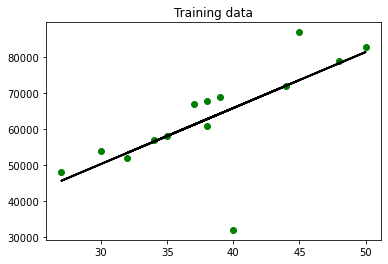

In [6]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)  # 拟合数据和标签

y_train_pred = linear_regression.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=2)
plt.title('Training data')
plt.show()

## 预测

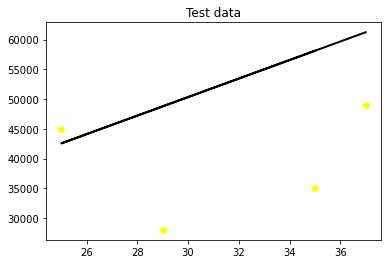

In [7]:
y_test_pred = linear_regression.predict(X_test)
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_test, y_test_pred, color='black', linewidth=2)
plt.title("Test data")
plt.show()

## 计算回归的准确性

In [8]:
from sklearn import metrics as sm
print("均方误差为", round(sm.mean_squared_error(y_test, y_test_pred), 4)) # 均方误差为 280670175.0107

均方误差为 280670175.0107


## 保存模型

In [9]:
import pickle
model_file = 'saved_linear_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(linear_regression, f)

## 加载模型并使用

In [11]:
with open(model_file, 'rb') as f:
    model = pickle.load(f)

y_test_pred_new = model.predict(X_test)
print('均方误差为', round(sm.mean_squared_error(y_test, y_test_pred_new), 4))

均方误差为 280670175.0107


## 岭回归

In [15]:
ridge_reg = linear_model.Ridge(
    alpha=0.1,
    fit_intercept=True,  # 使用截距
    max_iter=10000
)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
ridge_reg.fit(X, y)
y_test_pred_ridge = ridge_reg.predict(X_test)
y_test_pred_ridge

array([[54753.6125398 ],
       [37046.04457507],
       [44129.07176096],
       [58295.12613275]])